### Building a linear regression model

In this notebook, we go through the process of building a linear regression model to predict the 1 day return of the S&P 500. When building a model, the usual flow is: 
* Take the features that you have and apply whatever scaling is necessary 
* Run a naive model to see what the results look like on the training data
* Set up proper cross validation to get a sense of the out of sample performance
    * Make sure that this is all happening on the training data and nothing on the test set

* Document all of the runs that we are doing and see what the metrics look like for everything

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from scipy.stats import spearmanr, kendalltau, pearsonr


In [11]:
data = pd.read_csv('train.csv',index_col=0)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

The first pipeline that we are going to set up is simple standard scaling of all the features and sending them into the fit method. 

In [36]:
lin_model_standard_scale = Pipeline(
    steps = [
        ('standard_scale', StandardScaler()), 
        ('linear_model', Ridge(alpha = 1))
    ]
)

lin_model_standard_scale.fit(X, y)


Pipeline(steps=[('standard_scale', StandardScaler()),
                ('linear_model', Ridge(alpha=1))])

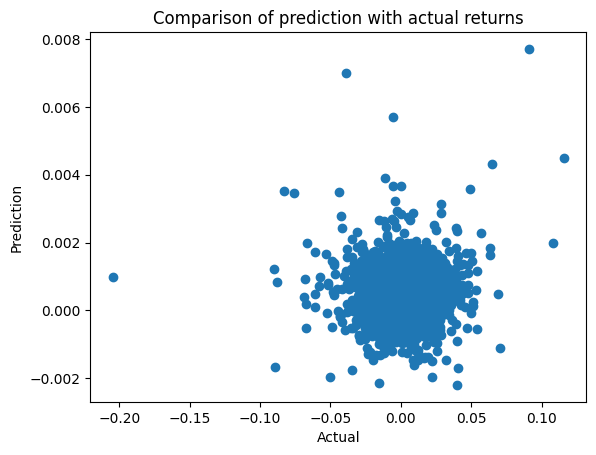

In [37]:
predictions = lin_model_standard_scale.predict(X)

fig, ax = plt.subplots()
ax.scatter(y, predictions)
ax.set(xlabel = 'Actual', ylabel = 'Prediction', title = 'Comparison of prediction with actual returns')

plt.show()

From initial inspection here, we see a couple of things: 
* Basic linear regression is not giving any real predictive power here as we can see there is basically no correlation of the prediction with the actual target
* The values that are being predicted are not even on the same scale
    * The predictions are very very small while the variance of the actual values is higher

Next things to do: 
* Tune the hyperparameters for a linear model and see how those affect our performance on a cross validation basis
* Get the final linear model and then apply it to our test dataset to get a final score 
    * Once we do this, we can move onto another model potentially and see how it does
    